In [36]:
# DATA READING AND PREPROCESSING
import pandas as pd
import numpy as np

#for visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Machine learning
import sklearn.metrics as metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
import scikitplot as skplt

import warnings
warnings.filterwarnings('ignore')


# Building classifiers for Iris classification

## Preliminary exploration of the dataset 

The Iris dataset can be dowloaded from Kaggle: https://www.kaggle.com/uciml/iris

<img width="650" height="250" src=https://kidiscience.cafe-sciences.org/wp-content/uploads/sites/13/2017/12/iris-machinelearning.png>

In [37]:
# reading the data file
iris_df = pd.read_csv('../dataset/Iris.csv')
# print the first 5 rows of the data
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [38]:
# print basic information about the dataset
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [39]:
iris_df.shape

(150, 6)

Iris_data contain total 6 features in which 4 features(SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalwidthCm) are independent features and 1 feature(Species) is dependent or target variable.

All Independent features has not-null float values and target variable has class labels(Iris-setosa, Iris-versicolor, Iris-virginica)

In [40]:
# Some basic statistics of the dataset
iris_df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


Text(0, 0.5, 'Frequency')

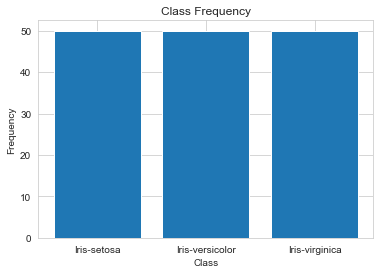

In [41]:
#checking the distribution of the 3 classes in the dataset
label, counts = np.unique(iris_df['Species'], return_counts=True)
plt.bar(label, counts)
plt.title('Class Frequency')
plt.xlabel('Class')
plt.xticks(range(0,3,1))
plt.ylabel('Frequency')

As we saw that each classes has equal number of data points then our Iris data said to be Balanced dataset. No Class is fully dominating in our dataset.

## Binary classification: Decision tree based classification of Iris-Setosa

In this part, we will try to build a classification model (Setosa-classifier) for predicting the class 'Iris-setosa'. 
Using scikitLearn Library, we evaluate the performance of the Decision Tree classifier: a tree-based model that can be used for binary as well as for multiclass classification

###  I. Create input and target vectors for the classifier and check class distribution. 
(The target vector will contain 0 and 1 depending on whether the target class is 'Iris-setosa' or no)

In [42]:
iris_features=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

y_setosa = (iris_df['Species']=='Iris-setosa')
iris_setosa = iris_df[iris_features]
iris_setosa['y_setosa'] = y_setosa

iris_setosa.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,y_setosa
0,5.1,3.5,1.4,0.2,True
1,4.9,3.0,1.4,0.2,True
2,4.7,3.2,1.3,0.2,True
3,4.6,3.1,1.5,0.2,True
4,5.0,3.6,1.4,0.2,True


In [43]:
#checking the distribution of the 2 classes
y_setosa.value_counts()

False    100
True      50
Name: Species, dtype: int64

Given the counts of the two classes, classifying iris-setosa is an imbalanced classificaion problem (30% of the samples belongs to the True class)
###  Feature correlation

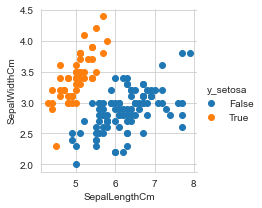

In [44]:
#Using Seaborn lib to visualized 2 features based on target variable.

sns.set_style('whitegrid')
sns.FacetGrid(iris_setosa, hue = 'y_setosa') \
   .map(plt.scatter, 'SepalLengthCm','SepalWidthCm') \
   .add_legend()

plt.show()

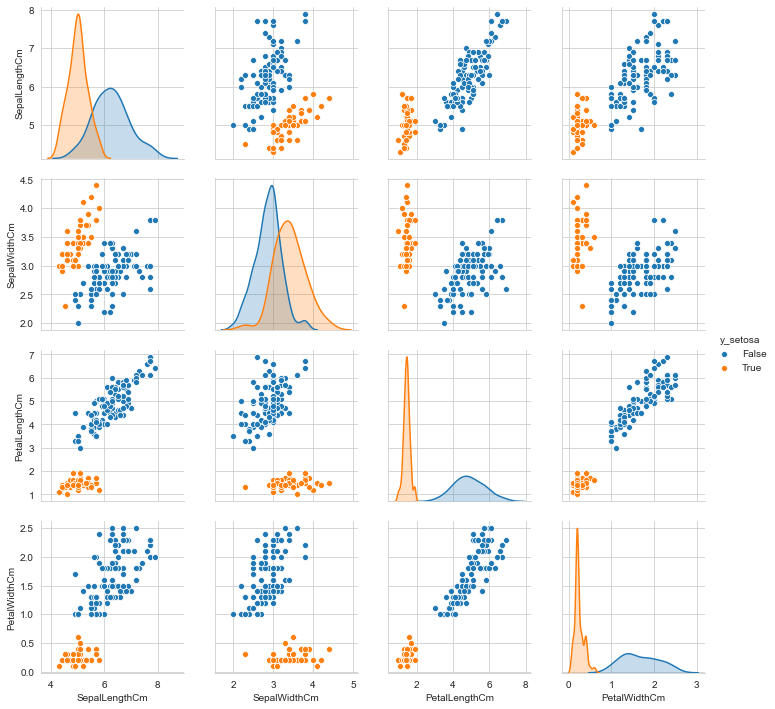

In [45]:
sns.pairplot(iris_setosa,vars=iris_features, hue='y_setosa')
plt.show()

In [46]:
# checking featurs correlation
iris_setosa.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,y_setosa
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,-0.717416
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,0.595601
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,-0.922688
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,-0.887510
y_setosa,-0.717416,0.595601,-0.922688,-0.887510,1.000000


### II. Building the setosa-classifier

In [47]:
X_data = iris_setosa[['SepalLengthCm','SepalWidthCm']]
y_data = iris_setosa['y_setosa']

   ### 1-  Split data into 70% for train and 30% for test. We use the built-in function (train_test_split) of sklearn.model_selection

In [50]:
X_train,X_test,y_train,y_test = train_test_split(X_data,y_data,test_size=0.3, stratify=y_data)

In [51]:
print("class distribution in the train set: ")
print(y_train.value_counts()/y_train.shape[0])
print("\nclass distribution in the test set: ")
print(y_test.value_counts()/y_test.shape[0])

class distribution in the train set: 
False    0.666667
True     0.333333
Name: y_setosa, dtype: float64

class distribution in the test set: 
False    0.666667
True     0.333333
Name: y_setosa, dtype: float64


### 2- Train classifier and make predictions

In [14]:
# Create Decision Tree classifer object
dtree = DecisionTreeClassifier(random_state=0)
# Train Decision Tree Classifer
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

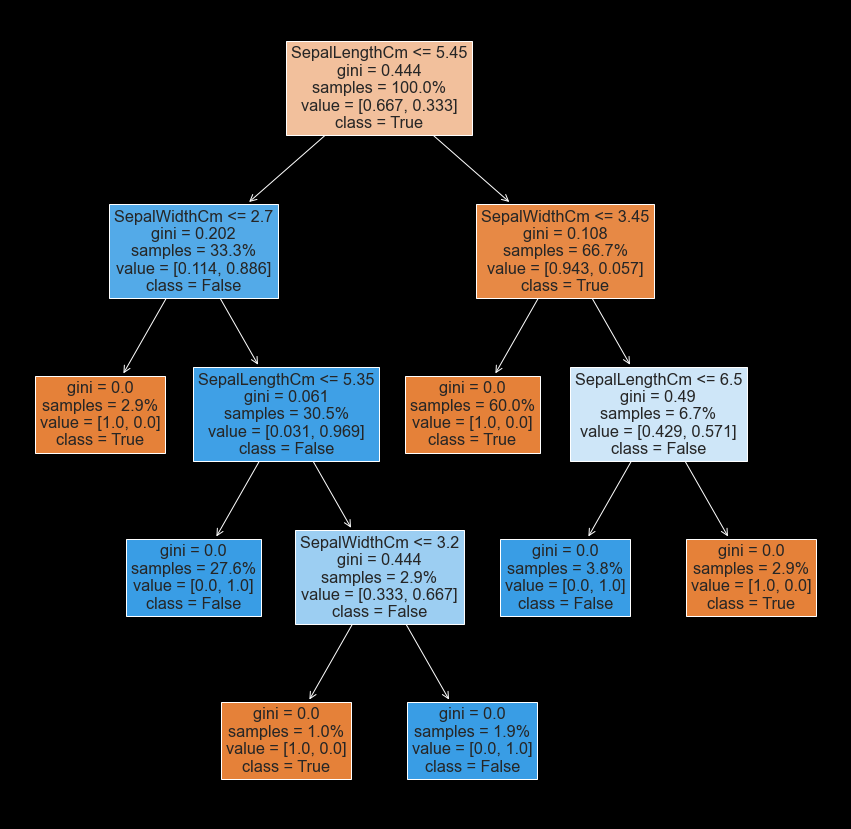

In [15]:
#visualize the tree
plt.figure(figsize=(15,15),facecolor='black')
tree.plot_tree(dtree, feature_names=iris_features, class_names=['True','False'],filled='True',
          proportion=True);

In [16]:
#Predict the response for test dataset
predictions = dtree.predict(X_test)
predictions

array([False, False, False,  True, False,  True, False, False, False,
        True,  True,  True, False,  True, False, False,  True, False,
        True, False,  True,  True,  True, False, False, False,  True,
       False, False, False, False,  True, False,  True, False, False,
       False, False, False, False, False, False, False, False, False])

### 3-  Evaluate the results (using different metrics)

#### Confusion matrix

[[30  0]
 [ 1 14]]


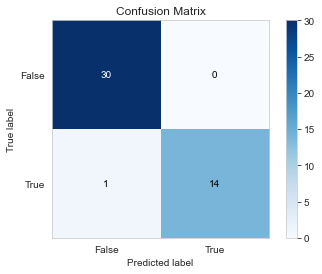

In [17]:
print(metrics.confusion_matrix(y_test, predictions))
# using scikiptlot
skplt.metrics.plot_confusion_matrix(y_test, predictions)

#### ROC curve

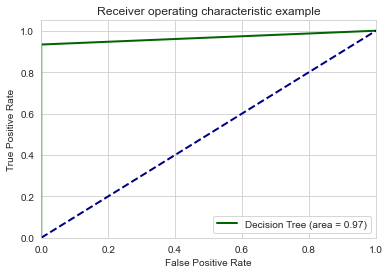

In [18]:
# Compute ROC curve and ROC area for class 1
fpr, tpr, _ = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)
lw = 2
plt.plot(fpr, tpr, color='darkgreen',
         lw=lw, label='Decision Tree (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [19]:
acc = metrics.accuracy_score(y_test, predictions)
print("Accuracy = %.2f" %(acc))
f1 = metrics.f1_score(y_test, predictions)
print("F1 = %.2f" %(f1))
p = metrics.precision_score(y_test, predictions)
print("Precision = %.2f" %(p))
r = metrics.recall_score(y_test, predictions)
print("Recall = %.2f" %(r))
loss = metrics.log_loss(y_test, predictions)
print("log-loss = %.2f" %(loss))
auc = metrics.roc_auc_score(y_test, predictions)
print("ROC-AUC = %.2f" %(auc))

Accuracy = 0.98
F1 = 0.97
Precision = 1.00
Recall = 0.93
log-loss = 0.77
ROC-AUC = 0.97


## Multiclass classification

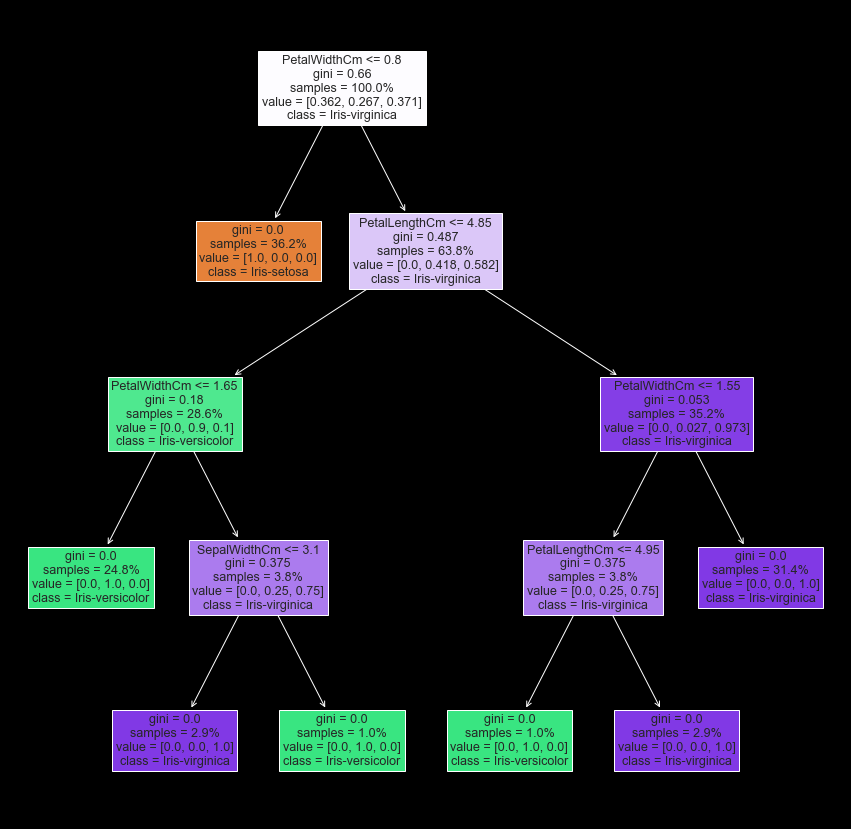

In [61]:
X_data = iris_df[iris_features]
y_data = iris_df['Species']

target_class=np.unique(y_data)

X_train,X_test,y_train,y_test = train_test_split(X_data,y_data,test_size=0.3)


# Create Decision Tree classifer object
DT = DecisionTreeClassifier(random_state=0)
# Train Decision Tree Classifer
DT.fit(X_train,y_train)

#visualize the tree
plt.figure(figsize=(15,15),facecolor='black')
tree.plot_tree(DT, feature_names=iris_features, class_names= target_class,filled='True',proportion=True);

### Evaluation using cross validation

In [62]:
#get cross validation scores using cross_val_score()
# 5 iterations
cv = cross_val_score(DT, X_train, y_train, cv=5, scoring='f1_macro')

In [63]:
cv

array([0.90277778, 1.        , 1.        , 1.        , 0.875     ])

In [64]:
print(f"Macro-f1 for each iteration: {cv}")
mean_macro_f1 = cv.mean()
std_macro_f1 = cv.std() * 2
print(f"Macro-f1 (statistics): {mean_macro_f1:.2f} (+/- {std_macro_f1:.2f})")

Macro-f1 for each iteration: [0.90277778 1.         1.         1.         0.875     ]
Macro-f1 (statistics): 0.96 (+/- 0.11)


### Performance on Test data

In [65]:
#Checking the performance of model on Actual Test data...
test_predictions = DT.predict(X_test)

print('Model Accuracy Score on totally unseen data(X_test) is:',metrics.accuracy_score(y_test, test_predictions)*100,'%')

Model Accuracy Score on totally unseen data(X_test) is: 95.55555555555556 %


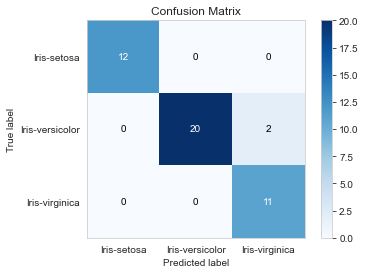

In [66]:
skplt.metrics.plot_confusion_matrix(y_test,test_predictions)

In [67]:
acc = metrics.accuracy_score(y_test,test_predictions)
print("Accuracy = %.2f" %(acc))
p=metrics.precision_score(y_test,test_predictions,average="macro")
print("precision_macro = %.2f" %(p))
p=metrics.precision_score(y_test,test_predictions,average="micro")
print("precision_micro = %.2f" %(p))
r = metrics.recall_score(y_test,test_predictions,average="macro")
print("recall_macro = %.2f" %(r))
r = metrics.recall_score(y_test,test_predictions,average="micro")
print("Recall_micro = %.2f" %(r))

Accuracy = 0.96
precision_macro = 0.95
precision_micro = 0.96
recall_macro = 0.97
Recall_micro = 0.96


In [68]:
print(metrics.classification_report(y_test,test_predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      0.91      0.95        22
 Iris-virginica       0.85      1.00      0.92        11

       accuracy                           0.96        45
      macro avg       0.95      0.97      0.96        45
   weighted avg       0.96      0.96      0.96        45



In [ ]:
precision=tps/predicted_positives
recall=tps/actual_positives

In [70]:
w1 = 12/45
w2 = 22/45
w3 = 11/45
print(w1, w2, w3)

0.26666666666666666 0.4888888888888889 0.24444444444444444
